In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("sensors_high_traffic/gnss/vehicle-id-2060.csv")
df_1.head()

,id,timestamp,lat,long,alt,speed
0,2060,2024-05-31 14:32:07.602375,264.897247,1.968023,0.001863,8.042441
1,2060,2024-05-31 14:32:15.420028,318.461792,1.984814,0.001843,8.048667
2,2060,2024-05-31 14:32:23.246081,374.052643,2.015452,0.001844,8.047997
3,2060,2024-05-31 14:32:31.304733,392.344055,39.501846,0.001845,8.044239
4,2060,2024-05-31 14:32:39.521624,392.299103,142.567795,0.001812,24.240914


In [3]:
df_1.describe()

,id,lat,long,alt,speed
count,94.0,94.000000,94.000000,94.000000,94.000000
mean,2060.0,232.150356,174.410698,0.001802,5.551898
std,0.0,110.704665,112.288910,0.000130,5.533765
min,2060.0,81.303596,-2.048900,0.001247,0.000000
25%,2060.0,110.702646,133.447330,0.001740,0.000000
50%,2060.0,245.401337,195.144554,0.001843,7.956012
75%,2060.0,338.640785,267.154179,0.001856,8.065196
max,2060.0,396.346741,330.609985,0.002165,24.240914


## print car velocity at each point of the map

<AxesSubplot:xlabel='long', ylabel='lat'>

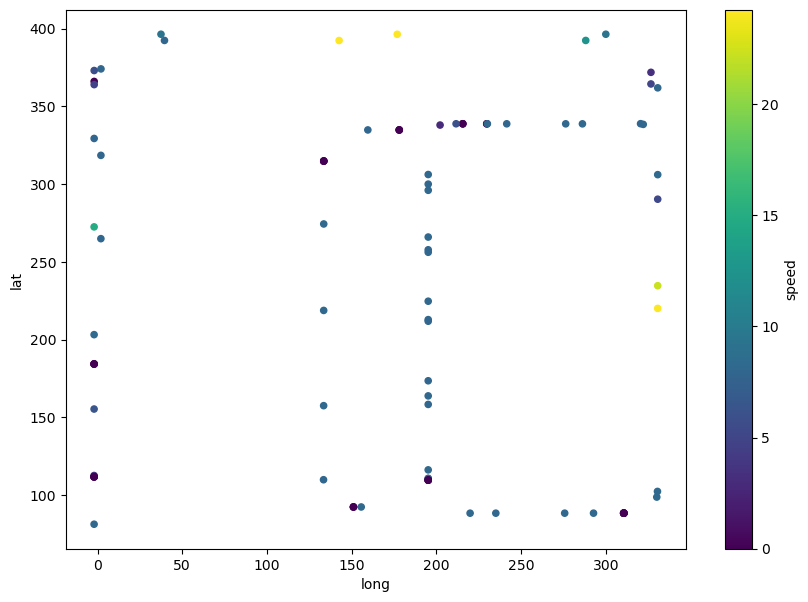

In [4]:
df_1.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [5]:
df_2 = pd.read_csv("sensors_high_traffic/gnss/vehicle-id-2876.csv")
df_2.head()

,id,timestamp,lat,long,alt,speed
0,2876,2024-05-31 14:56:48.117056,257.393707,1.971867,0.001760,8.282294
1,2876,2024-05-31 14:56:56.113934,310.206024,1.980632,0.001844,8.063539
2,2876,2024-05-31 14:57:04.236065,364.301941,2.009601,0.001844,8.065060
3,2876,2024-05-31 14:57:12.408011,392.359985,29.853329,0.001845,8.059107
4,2876,2024-05-31 14:57:20.464844,392.300262,128.720612,0.001797,24.325776


In [6]:
df_2.describe()

,id,lat,long,alt,speed
count,63.0,63.000000,63.000000,63.000000,6.300000e+01
mean,2876.0,216.401895,171.360578,0.001759,6.420296e+00
std,0.0,122.244949,127.022186,0.000281,6.463644e+00
min,2876.0,88.365562,-2.047046,0.000165,0.000000e+00
25%,2876.0,88.413109,39.682964,0.001680,1.097626e-07
50%,2876.0,182.381165,195.150909,0.001843,8.006066e+00
75%,2876.0,338.760925,300.519745,0.001857,8.066856e+00
max,2876.0,396.362793,330.609436,0.002777,2.432578e+01


## print car velocity at each point of the map (CAR2)

<AxesSubplot:xlabel='long', ylabel='lat'>

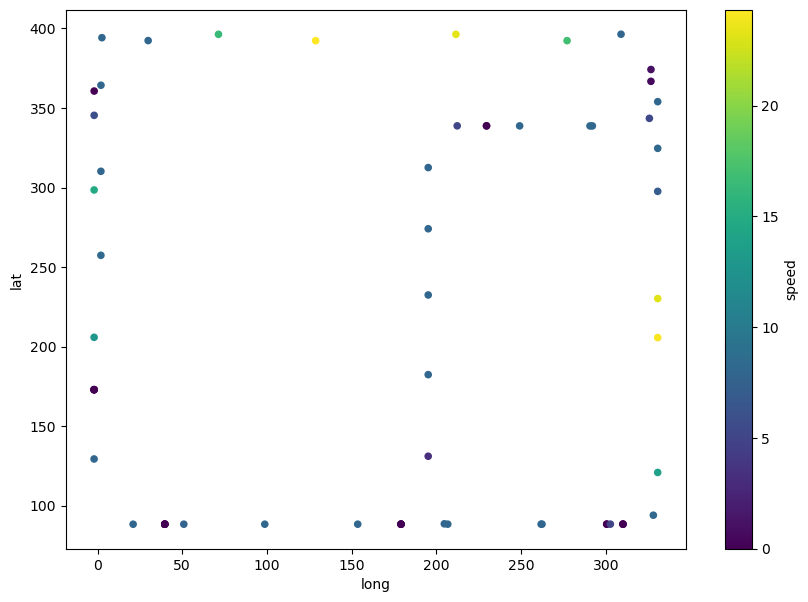

In [7]:
df_2.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [8]:
df = pd.concat([df_1, df_2])

In [9]:
df.head()

,id,timestamp,lat,long,alt,speed
0,2060,2024-05-31 14:32:07.602375,264.897247,1.968023,0.001863,8.042441
1,2060,2024-05-31 14:32:15.420028,318.461792,1.984814,0.001843,8.048667
2,2060,2024-05-31 14:32:23.246081,374.052643,2.015452,0.001844,8.047997
3,2060,2024-05-31 14:32:31.304733,392.344055,39.501846,0.001845,8.044239
4,2060,2024-05-31 14:32:39.521624,392.299103,142.567795,0.001812,24.240914


## print 2 cars trajectories, color by car

<AxesSubplot:xlabel='long', ylabel='lat'>

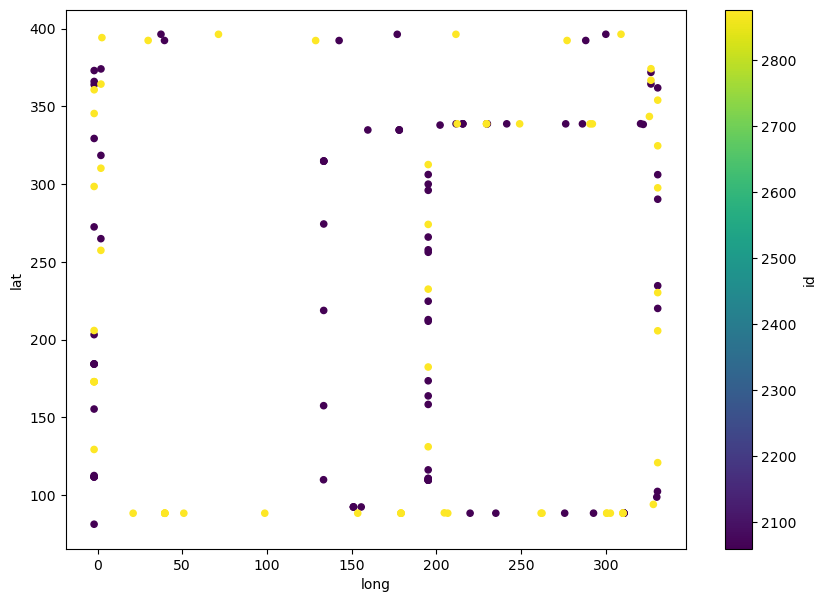

In [10]:
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## print 2 cars trajectories, color by timestamp

In [11]:
# df.plot.scatter(x="long",y="lat", c='timestamp', colormap='viridis', figsize=(10,7))

## Add car 3

<AxesSubplot:xlabel='long', ylabel='lat'>

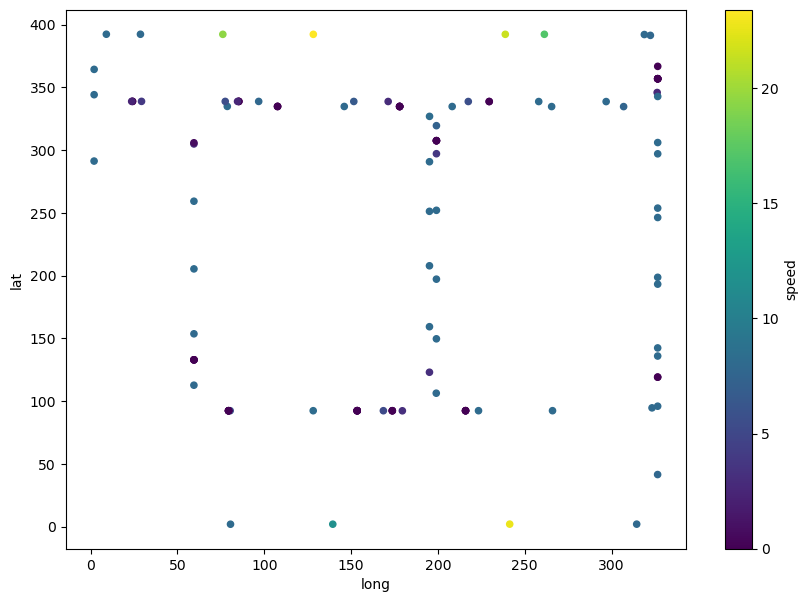

In [12]:
df_3 = pd.read_csv("sensors_high_traffic/gnss/vehicle-id-3692.csv")
df_3.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

## print trajectories of the 3 cars

<AxesSubplot:xlabel='long', ylabel='lat'>

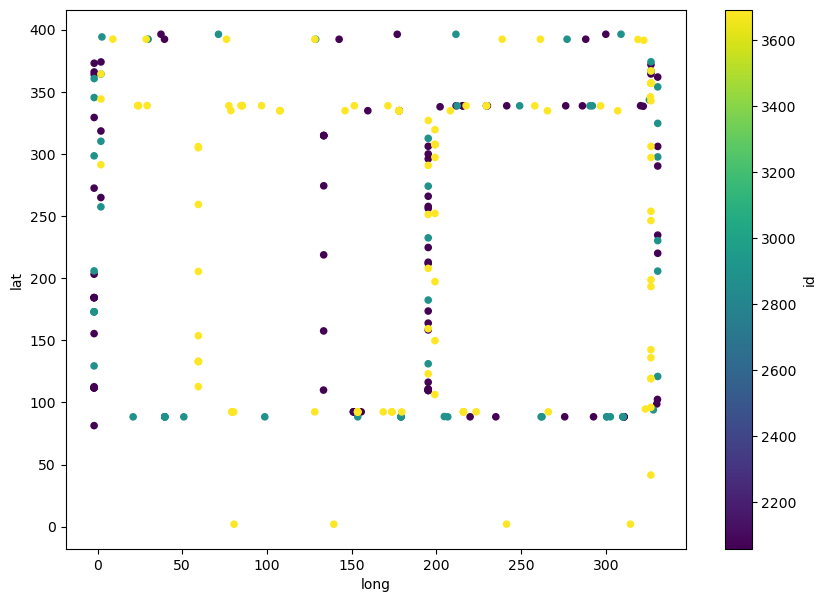

In [13]:
df = pd.concat([df, df_3])
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## Plot trajectories on top of the map
### color = speed

In [14]:
df.loc[df['lat'] <= 5, 'lat'] = 8

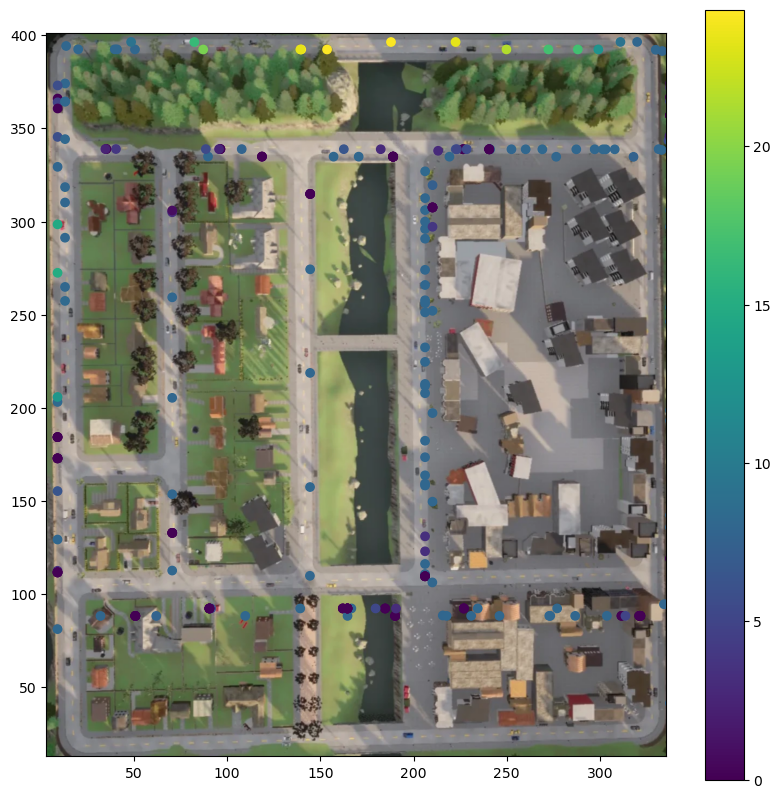

In [15]:
import matplotlib.cm as cm
import numpy as np

# tailored_extent = [df.long.min()-0.0002,
#                    df.long.max() + 0.0002,
#                    df.lat.min()-0.00026,
#                    df.lat.max() + 0.00026]

tailored_extent = [df.long.min()+5,
                   df.long.max()+5,
                   df.lat.min()+5,
                   df.lat.max()+5]

#colors = cm.rainbow(np.linspace(0, 1, 10))
# colors = cm.viridis(np.linspace(0, 8.5, 732))

img = plt.imread("town01aerial_croped.webp")
plt.figure(figsize=(10,10))
#plt.scatter(df.long.values*2,df.lat.values*2,c=df.speed, zorder=1)
plt.scatter(df.long.values+11,df.lat.values,c=df.speed, zorder=1)
plt.colorbar()
plt.imshow(img, zorder=0, extent=tailored_extent);

In [16]:
df

,id,timestamp,lat,long,alt,speed
0,2060,2024-05-31 14:32:07.602375,264.897247,1.968023,0.001863,8.042441
1,2060,2024-05-31 14:32:15.420028,318.461792,1.984814,0.001843,8.048667
2,2060,2024-05-31 14:32:23.246081,374.052643,2.015452,0.001844,8.047997
3,2060,2024-05-31 14:32:31.304733,392.344055,39.501846,0.001845,8.044239
4,2060,2024-05-31 14:32:39.521624,392.299103,142.567795,0.001812,24.240914
...,...,...,...,...,...,...
112,3692,2024-05-31 15:30:32.758484,41.528423,326.556763,0.001842,7.777575
113,3692,2024-05-31 15:30:41.378720,8.000000,314.502777,0.001932,7.921293
114,3692,2024-05-31 15:30:50.204479,8.000000,241.361603,0.001745,22.695963
115,3692,2024-05-31 15:30:58.628612,8.000000,139.455261,0.001810,11.615349
